# Dimension reduction and classification on mnist dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.decomposition import *
from sklearn.manifold import *

from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

## Part1: Import and Visualize data

[0 1 2 3 4 5 6 7 8 9]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[0 1 2 ... 8 9 8]


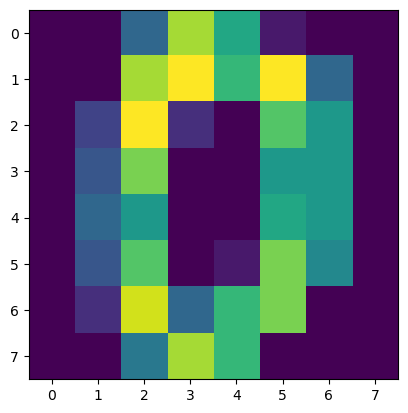

In [2]:
data = load_digits()
print(data.target_names)
print(data.images[0])             # 8 x 8 Matrix for pixels
print(data.target)
plt.imshow(data.images[0]);

## Part2: Dimension reduction

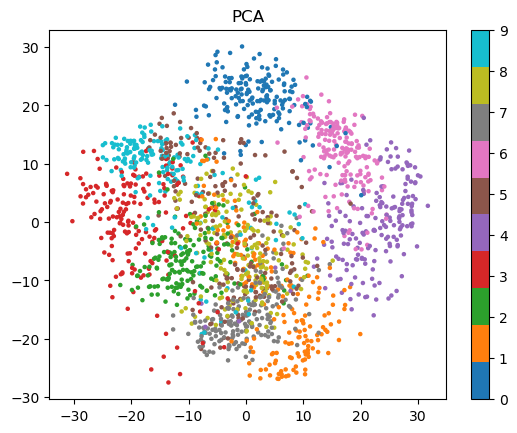

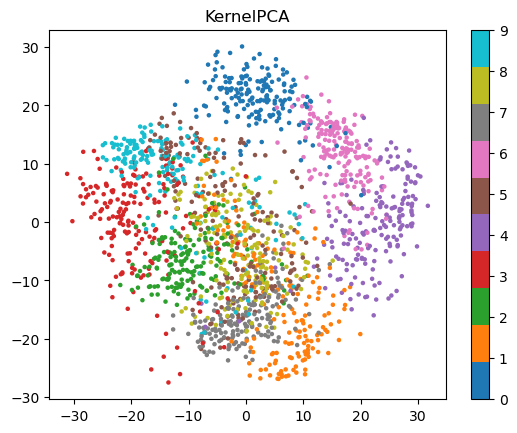

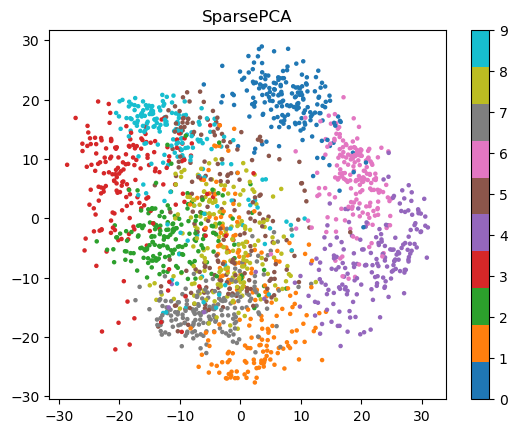

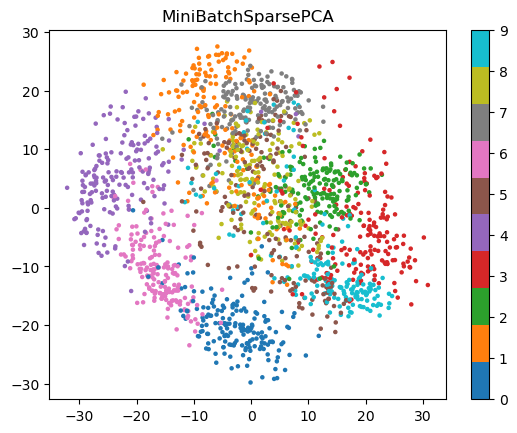

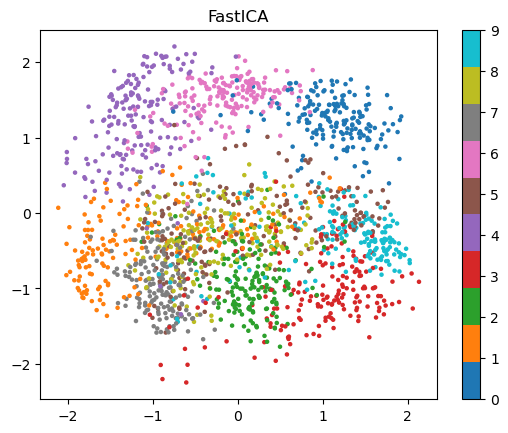

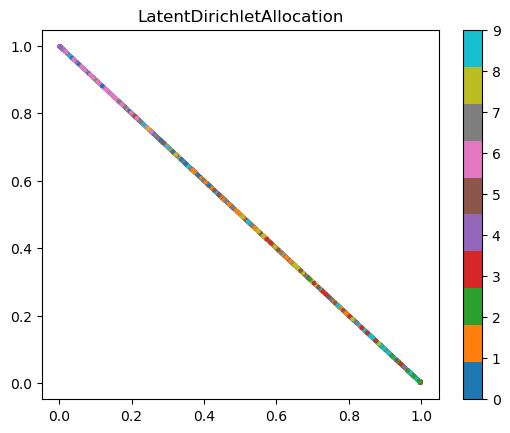

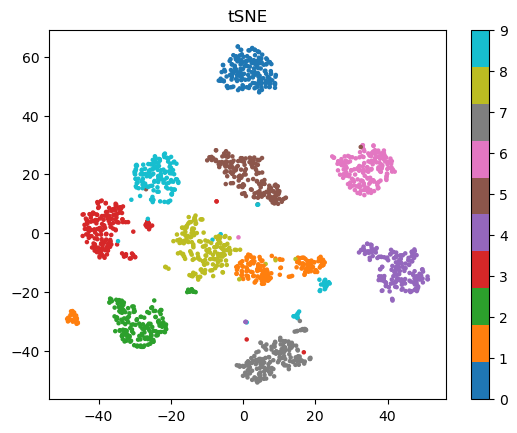

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


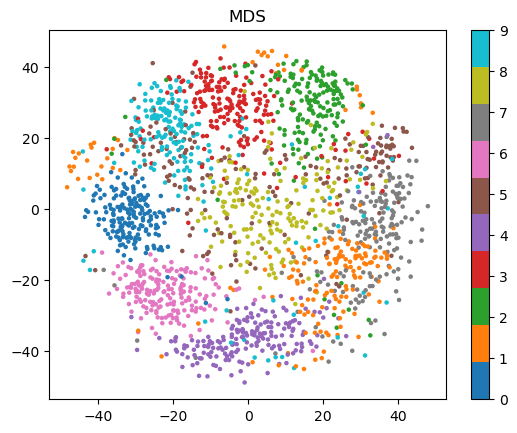

In [3]:
def visualize_dim_red(name, alg, data):
    al = alg(2)
    tr = al.fit_transform(data.data)
    plt.scatter(tr[:,0], tr[:,1], c=data.target, cmap='tab10', s=5)
    plt.colorbar()
    plt.title(name)
    plt.show()

dim_reg_algs = {'PCA': PCA, 'KernelPCA': KernelPCA, 'SparsePCA': SparsePCA, 'MiniBatchSparsePCA': MiniBatchSparsePCA,
                'FastICA': FastICA, 'LatentDirichletAllocation': LatentDirichletAllocation, 'tSNE': TSNE, 'MDS': MDS}

for name, alg in dim_reg_algs.items():
    visualize_dim_red(name, alg, data)

### Tips: 1- MDS Very time-consuming. 2- tSNE fit best among all on this data.

## Part3: Classification

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

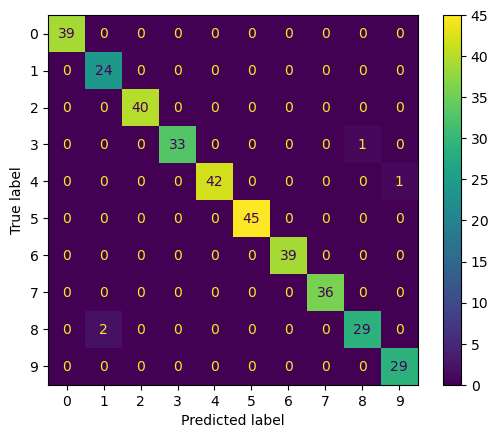

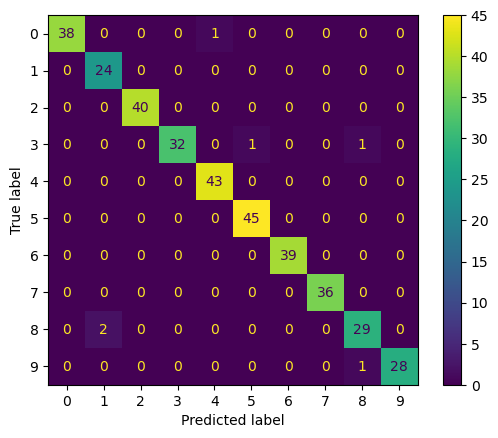

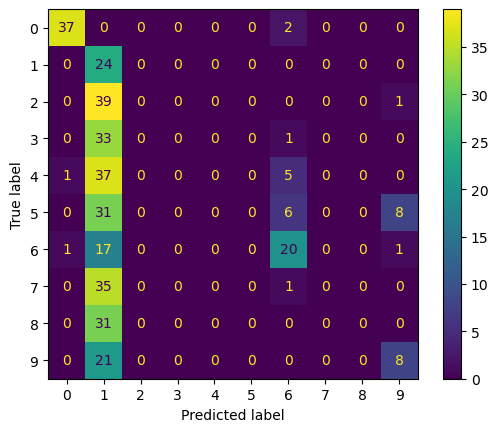

In [5]:
cls_algs = {'SVC': SVC, 'RandomForestClassifier': RandomForestClassifier, 'AdaBoostClassifier': AdaBoostClassifier}

for name, alg in cls_algs.items():
    al = alg()
    al.fit(X_train, y_train)
    ConfusionMatrixDisplay.from_estimator(al, X_test, y_test)

### Support Vector Classifier had better performance among other models.